In [3]:
import keras
keras.__version__

'2.2.4'

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt

#准备IMDB数据
max_features = 10000   #仅保留训练数据中前10000最常出现的单词
max_len = 500
print('loading data...')
try:
    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
except:
    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len) #pad_sequences将序列转化为经过填充以后的一个新序列
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:' , x_train.shape)
print('x_test shape:' , x_test.shape)


Using TensorFlow backend.


loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [3]:
#在IMDB数据上训练并评估一个简单的一维卷积神经网络
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable para

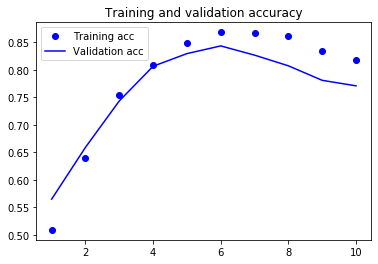

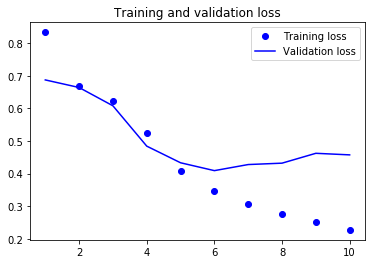

In [4]:
#绘制结果
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
#从头开始重新训练一个模型
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

#model.summary()

model.compile(optimizer=RMSprop(1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=6, batch_size=128)
results = model.evaluate(x_test, y_test)
print(results)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/6
25000/25000 [==============================] - 163s 7ms/step - loss: 0.7954 - acc: 0.5222
Epoch 2/6
25000/25000 [==============================] - 158s 6ms/step - loss: 0.6595 - acc: 0.6707
Epoch 3/6
25000/25000 [==============================] - 153s 6ms/step - loss: 0.5778 - acc: 0.7751
Epoch 4/6
25000/25000 [==============================] - 154s 6ms/step - loss: 0.4373 - acc: 0.8345
Epoch 5/6
25000/25000 [==============================] - 157s 6ms/step - loss: 0.3575 - acc: 0.8604
Epoch 6/6
25000/25000 [==============================] - 53s 2ms/step
[0.4302061793041229, 0.81792]
